In [578]:
import numpy as np
from datascience import *
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

# Media

# üìå **Media (Promedio)**

La **media aritm√©tica** de un conjunto de datos es una medida de tendencia central que representa el valor promedio de los datos. Se calcula sumando todos los valores y dividiendo por la cantidad total de elementos.

## **üìñ F√≥rmula de la Media**
Si tenemos un conjunto de $ n $ valores $ x_1, x_2, \dots, x_n $, la media se define como:


\begin{equation}
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
\end{equation}


Donde:
- $ \mu $ es la media.
- $ x_i $ son los valores del conjunto de datos.
- $ n $ es el n√∫mero total de valores.

Para una ecuaci√≥n m√°s corta, usamos la notaci√≥n en l√≠nea:  
$$ \mu = \frac{1}{n} \sum x_i $$

## **üñ•Ô∏è C√°lculo en Python con la libreria datascience**
Podemos calcular la media de una lista de valores usando Python:

```python
import datascience

# Datos de ejemplo
datos = make_array(10, 20, 30, 40, 50)

# Calcular la media
media = np.mean(datos)

print(f"La media es: {media}")


In [604]:
values = make_array(2, 3, 3, 9)
values.mean()

4.25

In [605]:
values = make_array(1, 0, 0, 1,0,1)

In [606]:
values.mean()

0.5

In [607]:
values.sum()

3

La media no es el punto medio de los datos


In [608]:
make_array(2, 3, 3, 9)

array([2, 3, 3, 9])

\begin{equation}
\frac{2+3+3+9}{4}
\end{equation}

In [609]:
values1 = make_array(2, 3, 3, 9)
values2 = make_array(2, 2, 3, 3, 3 ,3, 9, 9)
values3 = make_array(2, 2, 2,3, 3, 3 ,3,3,3 ,9, 9,9)

In [610]:
print("Media 1", np.mean(values1))
print("Media 2",np.mean(values2))
print("Media 3",np.mean(values3))

Media 1 4.25
Media 2 4.25
Media 3 4.25


En el anterior caso en cada uno de los arreglos  se mantiene la proporci√≥n de n√∫meros diferentes, y la media toma el mismo valor, es decir, cuando la proporci√≥n de n√∫meros es la misma en diferentes arreglos, la media toma el mismo valor, es independiente de la cantidad de n√∫meros

Text(0, 0.5, '% por unidad')

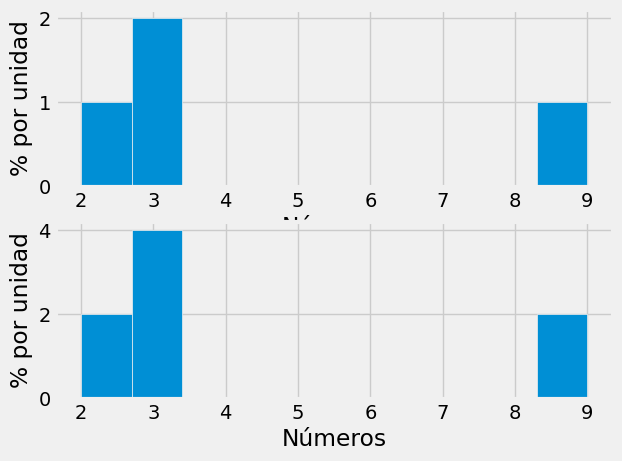

In [611]:
plots.subplot(211)
plots.hist(values1)
plots.xlabel("N√∫meros")
plots.ylabel("% por unidad")
plots.subplot(212)
plots.hist(values2)
plots.xlabel("N√∫meros")
plots.ylabel("% por unidad")


Debido a que la media es un punto de equilibrio, se puede entender como el centro de gravedad del conjunto de datos,  a veces se muestra como un  tri√°ngulo en la base del histograma.

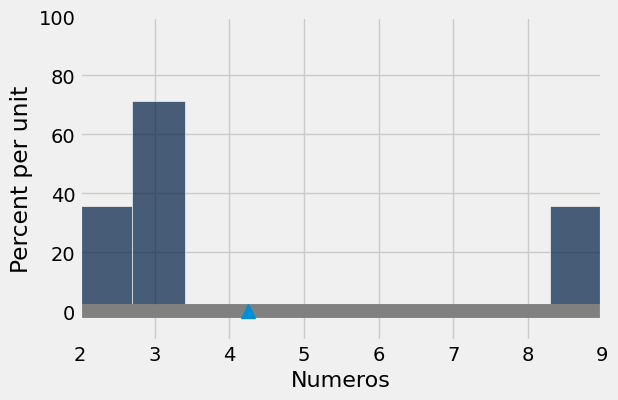

In [612]:
dt = Table().with_column("Numeros", values1)
dt.hist()

plots.ylim(-0.1,1)
plots.xlim(2,9)
plots.axhline(0,color="gray",lw=10,)
plots.plot(dt["Numeros"].mean(),0, "^", ms=10)


# üìå **Mediana: Punto de Equilibrio sobre los Datos**

La **mediana**  es el valor que divide la distribuci√≥n en dos partes **iguales**, de modo que el **50% de los datos est√°n por debajo** y el **50% est√°n por encima**.

## **üìñ C√°lculo de la Mediana**
Dado un conjunto de $ n $ valores $ x_1, x_2, \dots, x_n $ ordenados de menor a mayor:

- **Si $ n $ es impar**, la mediana es el valor central:
  
  \begin{equation}
  \tilde{x} = x_{\frac{n+1}{2}}
  \end{equation}
  

- **Si $ n $ es par**, la mediana es el promedio de los dos valores centrales:
  
  \begin{equation}
  \tilde{x} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}}{2}
  \end{equation}
  

## **üñ•Ô∏è C√°lculo en Python**
Podemos calcular la mediana de un conjunto de datos usando `numpy`:

```python
import numpy as np

# Datos de ejemplo
y = make_array(10, 20, 30, 40, 50)

# Calcular la mediana
mediana = percentile(50, y)

print(f"La mediana es: {mediana}")


# La media y la mediana

La media o promedio,  es el punto de equilibrio de un  histograma, y la mediana,  es el "punto medio" de los datos.

Cuando la distribucion de datos es simetrica, la media y la mediana toman el mismo valor.


In [613]:
no_symmetric1 = make_array(2, 3, 3, 9)
print(np.mean(no_symmetric1))
print(percentile(50,no_symmetric1))

4.25
3


In [614]:
no_symmetric2 = make_array(2, 2, 2,3, 3, 3 ,3,3,3 ,9, 9,9)
print(np.mean(no_symmetric2))
print(percentile(50,no_symmetric2))

4.25
3


In [615]:
symmetric1 = make_array(2, 3, 3, 4)

In [616]:
print(np.mean(symmetric1))
print(percentile(50,symmetric1))

3.0
3



Si la puntuaci√≥n de un estudiante en un examen est√° por debajo de la media, ¬øeso implica que el estudiante est√° en la mitad inferior de la clase en esa prueba?

In [617]:
symmetric1 = make_array(2, 3, 3, 4)
tb = Table().with_columns("S",symmetric1 ,"NS", no_symmetric1 )

(-0.1, 0.5)

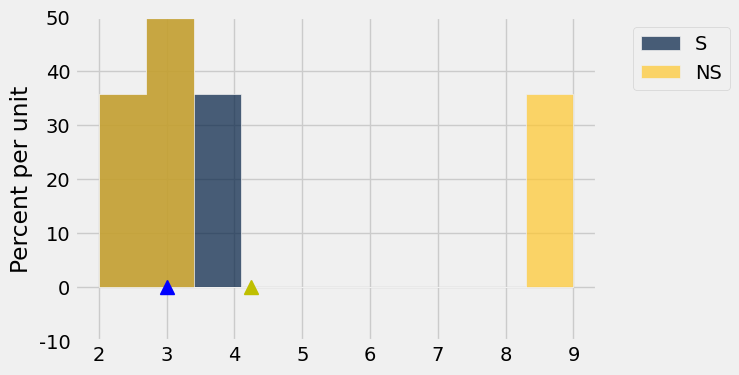

In [618]:
tb.hist()
plots.plot(tb["S"].mean(),0, "^b", ms=10)
plots.plot(tb["NS"].mean(),0, "^y", ms=10)
plots.ylim(-0.1,0.5)

In [619]:
print(percentile(50,symmetric1))
print(percentile(50,no_symmetric1))

3
3


# Ejemplo 


In [620]:
path_data=""
sf2015 = Table.read_table(path_data + 'san_francisco_2015.csv').where('Salaries', are.above(10000))
sf_2015 = sf2015.where('Salaries', are.above(10000))
compensation = sf2015.column('Total Compensation')
mediana = percentile(50, compensation)
media = np.mean(compensation)

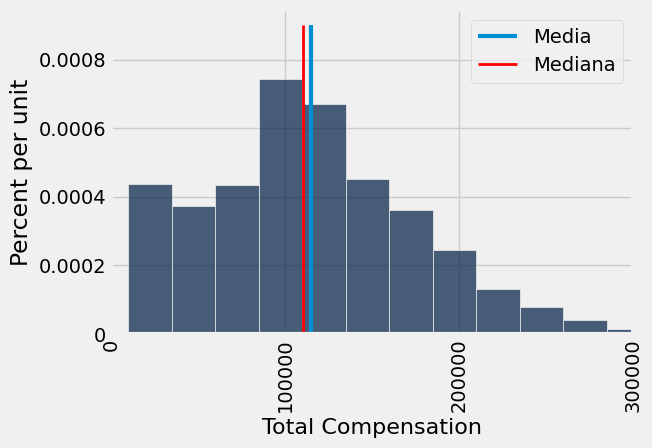

In [621]:
sf2015.select('Total Compensation').hist(bins = np.arange(10000, 700000, 25000))
plots.vlines(media,ymin=0, ymax=0.000009, lw=3.0,label="Media")
plots.vlines(mediana,ymin=0, ymax=0.000009,color="r",lw=2.0,label="Mediana")
plots.xlim(0, 300000)
plots.legend()

Las distribuciones de ingresos de grandes poblaciones tienden a estar sesgadas. Cuando la mayor parte de una poblaci√≥n tiene ingresos medios a bajos, pero una proporci√≥n muy peque√±a tiene ingresos muy altos, el histograma tiene una cola larga y delgada a la derecha.

# El tama√±o aproximado de las desviaciones del promedio

El objetivo es medir aproximadamente qu√© tan lejos est√°n los n√∫meros de su promedio. Para hacer esto, primero necesitamos el promedio



In [626]:
any_numbers = make_array(1, 2, 2, 10)
mean = np.mean(any_numbers)
deviations = any_numbers - mean


In [627]:
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value | Deviation from Average
1     | -2.75
2     | -1.75
2     | -1.75
10    | 6.25

In [628]:
mean

3.75

In [629]:
sum(deviations)

0.0

In [630]:
np.mean(deviations)

0.0

Debido a esto, la media de las desviaciones no es una medida √∫til del tama√±o de las desviaciones.

In [632]:
squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value | Deviation from Average | Squared Deviations from Average
1     | -2.75                  | 7.5625
2     | -1.75                  | 3.0625
2     | -1.75                  | 3.0625
10    | 6.25                   | 39.0625

In [633]:
variance = np.mean(squared_deviations)
variance

13.1875

Varianza: La desviaci√≥n media al cuadrado calculada anteriormente se llama varianza de los valores.



In [634]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1
sd = variance ** 0.5
sd

3.6314597615834874

# Pasos para determinar la desviaciones del promedio

1. Calcular el promedio 
2. Computar las desviaciones de los datos respecto al  promedio
3. Calcular las desviaciones cuadradas
4. Calcular la varianza
5. Calcular la raiz cuadrada

- En python solo basta con 
```python
x=make_array(...)
np.std(x)
```

# Desviaci√≥n est√°ndar

Definici√≥n. El SD de una lista se define como el cuadrado medio de ra√≠z de las desviaciones del promedio.

In [635]:
np.std(any_numbers)

3.6314597615834874

In [636]:
path = "nba2013.csv"

In [637]:
nba13 = Table.read_table(path)

In [638]:
nba13["Height"]= nba13.apply(lambda x: x*0.0254,"Height")

In [639]:
nba13

Name            | Position | Height | Weight | Age in 2013
DeQuan Jones    | Guard    | 2.032  | 221    | 23
Darius Miller   | Guard    | 2.032  | 235    | 23
Trevor Ariza    | Guard    | 2.032  | 210    | 28
James Jones     | Guard    | 2.032  | 215    | 32
Wesley Johnson  | Guard    | 2.0066 | 215    | 26
Klay Thompson   | Guard    | 2.0066 | 205    | 23
Thabo Sefolosha | Guard    | 2.0066 | 215    | 29
Chase Budinger  | Guard    | 2.0066 | 218    | 25
Kevin Martin    | Guard    | 2.0066 | 185    | 30
Evan Fournier   | Guard    | 2.0066 | 206    | 20
... (495 rows omitted)

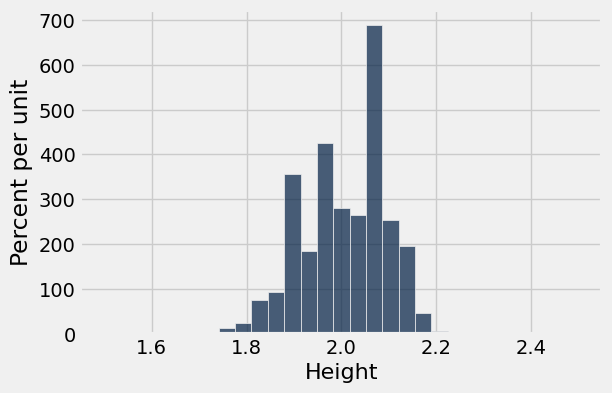

In [640]:
nba13.select('Height').hist(bins=np.linspace(1.5, 2.50, 30))

In [641]:
mean_height = np.mean(nba13.column('Height'))
mean_height

2.0082598019801976

¬øA que altura estan los jugadores del promedio?

In [642]:
sd_height = np.std(nba13.column('Height'))
sd_height

0.087645168448899871

In [643]:
nba13.sort('Height', descending=True).show(3)

In [645]:
2.2098 - mean_height

0.20154019801980239

In [646]:
(2.2098 - mean_height)/sd_height

2.299501519439799

En otras palabras, la altura del jugador m√°s alto estaba a unos 2,3 SD por encima de la media.

Jugador mas bajo

In [647]:
nba13.sort('Height').show(3)

In [648]:
(1.75526 - mean_height)/sd_height

-2.8866371810067899

# Primera raz√≥n principal para medir  la SD

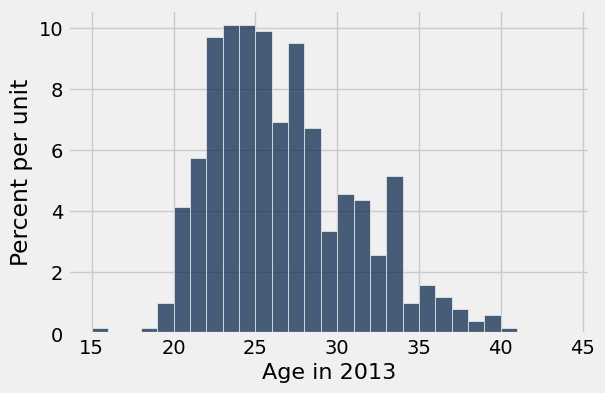

In [650]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [651]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.3212004417203067)

In [653]:
nba13.sort('Age in 2013', descending=True).show(3)

In [654]:
(40 - mean_age)/sd_age

3.1958482778922357

# **L√≠mite de Chebychev (Desigualdad de Chebychev)**

El **L√≠mite de Chebychev** o **Desigualdad de Chebychev** es un resultado estad√≠stico que nos dice qu√© proporci√≥n de los datos en cualquier distribuci√≥n (sin importar su forma) caer√° dentro de un cierto n√∫mero de desviaciones est√°ndar de la media.

## **F√≥rmula de la Desigualdad de Chebychev**
Para cualquier conjunto de datos con media $\mu$ y desviaci√≥n est√°ndar $\sigma$, la proporci√≥n de valores que est√°n dentro de $k$ desviaciones est√°ndar de la media $\mu \pm k\sigma$ es al menos:

\begin{equation}
1 - \frac{1}{k^2}
\end{equation}

para cualquier \( k > 1 \).

## **Interpretaci√≥n**
Esto significa que, independientemente de la forma de la distribuci√≥n (ya sea sim√©trica, sesgada o con colas largas), podemos hacer las siguientes afirmaciones:

- **Al menos el 75%** de los datos est√°n dentro de **2 desviaciones est√°ndar** de la media $(\mu \pm 2\sigma)$.
  
\begin{equation}
1 - \frac{1}{2^2} = 1 - \frac{1}{4} = 0.75 \text{ (o 75\%)}
\end{equation}

- **Al menos el 89%** de los datos est√°n dentro de **3 desviaciones est√°ndar** de la media (\(\mu \pm 3\sigma\)).

\begin{equation}
1 - \frac{1}{3^2} = 1 - \frac{1}{9} = 0.89 \text{ (o 89\%)}
\end{equation}

- **Al menos el 93.75%** de los datos est√°n dentro de **4 desviaciones est√°ndar** de la media (\(\mu \pm 4\sigma\)).

\begin{equation}
1 - \frac{1}{4^2} = 1 - \frac{1}{16} = 0.9375 \text{ (o 93.75\%)}
\end{equation}

## **Ejemplo**
Supongamos que los ingresos en una ciudad tienen una media de **40,000** y una desviaci√≥n est√°ndar de **10,000**. Si usamos la desigualdad de Chebychev:

- Al menos el **75%** de las personas tienen ingresos entre **20,000 y 60,000** $(\mu \pm 2\sigma )$.
- Al menos el **89%** tienen ingresos entre **10,000 y 70,000** $(\mu \pm 3\sigma)$.

Esto es √∫til cuando no sabemos si los datos siguen una distribuci√≥n normal, ya que nos da una forma de estimar cu√°ntos datos estar√°n dentro de ciertos rangos.


# Unidades estandar

\begin{equation}
z=\frac{\mathrm{value}-\mathrm{average}}{SD}
\end{equation}

In [655]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

# Ejemplo 

In [657]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date   | Flight Number | Destination | Delay | Delay (Standard Units)
6/1/15 | 73            | HNL         | 257   | 6.08766
6/1/15 | 217           | EWR         | 28    | 0.287279
6/1/15 | 237           | STL         | -3    | -0.497924
6/1/15 | 250           | SAN         | 0     | -0.421937
6/1/15 | 267           | PHL         | 64    | 1.19913
6/1/15 | 273           | SEA         | -6    | -0.573912
6/1/15 | 278           | SEA         | -8    | -0.62457
6/1/15 | 292           | EWR         | 12    | -0.117987
6/1/15 | 300           | HNL         | 20    | 0.0846461
6/1/15 | 317           | IND         | -10   | -0.675228
... (13815 rows omitted)

In [658]:
united.sort('Delay', descending=True)

Date    | Flight Number | Destination | Delay | Delay (Standard Units)
6/21/15 | 1964          | SEA         | 580   | 14.269
6/22/15 | 300           | HNL         | 537   | 13.1798
6/21/15 | 1149          | IAD         | 508   | 12.4453
6/20/15 | 353           | ORD         | 505   | 12.3693
8/23/15 | 1589          | ORD         | 458   | 11.1788
7/23/15 | 1960          | LAX         | 438   | 10.6722
6/23/15 | 1606          | ORD         | 430   | 10.4696
6/4/15  | 1743          | LAX         | 408   | 9.91236
6/17/15 | 1122          | HNL         | 405   | 9.83637
7/27/15 | 572           | ORD         | 385   | 9.32979
... (13815 rows omitted)



la proporci√≥n de estos valores extremos es peque√±a, y los l√≠mites de Chebychev siguen siendo ciertos. Por ejemplo, calculemos el porcentaje de tiempos de retraso que est√°n en el rango "promedio
¬±
3 SD". Esto es el mismo que el porcentaje de veces para las que las unidades est√°ndar est√°n en el rango (-3, 3). Eso es alrededor del 98 %, como se calcula a continuaci√≥n, consistente con el l√≠mite de Chebychev de "al menos el 89 %

In [659]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

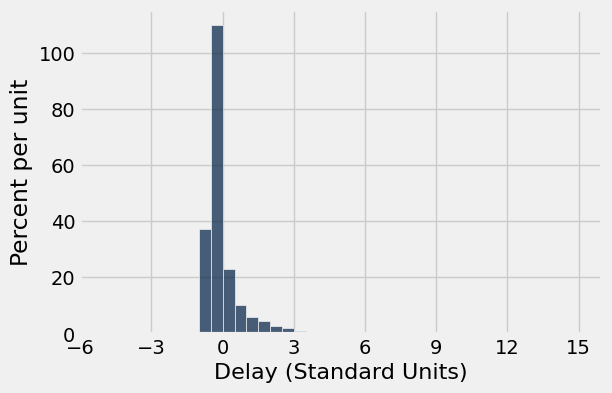

In [660]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));

# La desviacion estandar y la curva normal

Sabemos que la media es el punto de equilibrio del histograma. A diferencia de la media, la SD generalmente no es f√°cil de identificar mirando el histograma.

In [661]:
baby = Table.read_table('baby.csv')
baby["Maternal Height"] = baby.apply(lambda x:x*0.0254,"Maternal Height")

In [662]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

1.6000000000000001

In [663]:
sd_height = np.round(np.std(heights), 1)
sd_height

0.10000000000000001

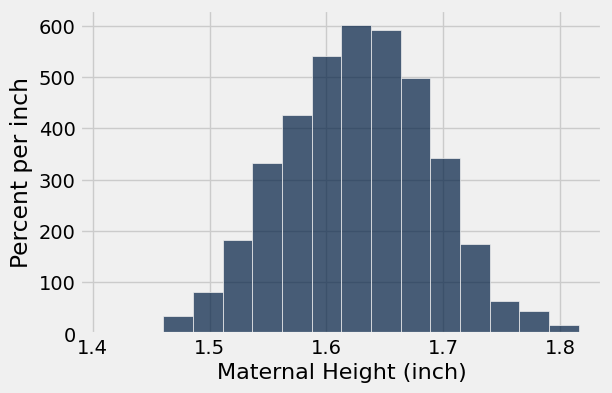

In [664]:
baby.hist('Maternal Height', bins=0.0254*np.arange(55.5, 72.5, 1), unit='inch')
#positions = 0.0254*np.arange(-3, 3.1, 1)*sd_height + mean_height
#plots.xticks(positions);

# La curva normal estandar

# **Caracter√≠sticas de una Funci√≥n Normal**

Una **distribuci√≥n normal** (o distribuci√≥n de Gauss) es una funci√≥n de densidad de probabilidad que sigue la forma de una **campana sim√©trica** y est√° definida por dos par√°metros:

- **Media (\(\mu\))**: Representa el centro de la distribuci√≥n.
- **Desviaci√≥n est√°ndar (\(\sigma\))**: Controla el ancho de la curva, es decir, qu√© tan dispersos est√°n los datos alrededor de la media.

## **Ecuaci√≥n de la Distribuci√≥n Normal**
La funci√≥n de densidad de probabilidad (PDF) de una distribuci√≥n normal est√° dada por la ecuaci√≥n:

\begin{equation}
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{equation}

donde:
- $ x $ es el valor de la variable aleatoria.
- $ \mu $ es la media de la distribuci√≥n.
- $ \sigma $ es la desviaci√≥n est√°ndar.
- $ e $ es la base de los logaritmos naturales $\approx 2.718$
- $ \pi $ es la constante matem√°tica $\approx 3.1416$

## **Propiedades de la Distribuci√≥n Normal**
1. **Simetr√≠a**: La curva es sim√©trica respecto a la media (\(\mu\)).
2. **Campana**: La forma de la curva sigue una campana con colas que se extienden indefinidamente sin tocar el eje \(x\).
3. **√Årea total bajo la curva**: Siempre es **1** (100% de probabilidad).
4. **Regla Emp√≠rica (68-95-99.7)**:
   - **68%** de los valores est√°n dentro de **1 desviaci√≥n est√°ndar** $\mu \pm \sigma$
   - **95%** de los valores est√°n dentro de **2 desviaciones est√°ndar** $\mu \pm 2\sigma$
   - **99.7%** de los valores est√°n dentro de **3 desviaciones est√°ndar** $\mu \pm 3\sigma$

## **Ejemplo en Python**
El siguiente c√≥digo genera la gr√°fica de una **distribuci√≥n normal** y resalta el √°rea bajo la curva para un rango espec√≠fico utilizando la funci√≥n de distribuci√≥n acumulativa (**CDF**).


funci√≥n de distribuci√≥n acumulativa

In [467]:
from scipy import stats
stats.norm.cdf(1)

0.84134474606854293

In [468]:
1- stats.norm.cdf(1)

0.15865525393145707

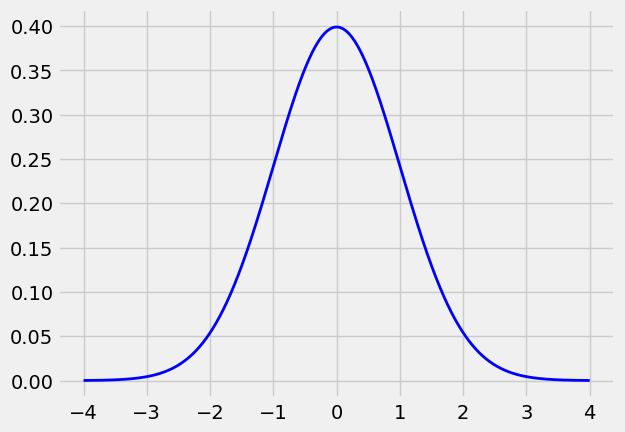

In [470]:
# Par√°metros de la distribuci√≥n normal
mu = 0      # Media
sigma = 1   # Desviaci√≥n est√°ndar

# Rango de valores para X
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Funci√≥n de densidad de probabilidad (PDF)
pdf = norm.pdf(x, mu, sigma)
plots.plot(x, pdf, 'b', linewidth=2, label="Distribuci√≥n Normal")

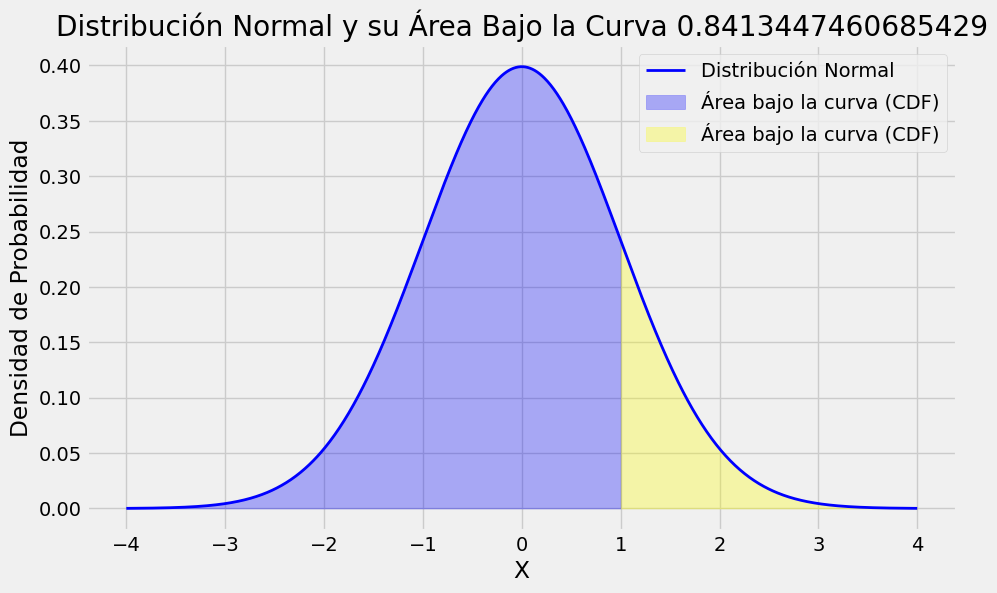

In [471]:
# Crear la gr√°fica
plots.figure(figsize=(10, 6))
plots.plot(x, pdf, 'b', linewidth=2, label="Distribuci√≥n Normal")

# Rango para sombrear (por ejemplo, entre -1 y 1)
x_fill = np.linspace(-4*sigma, 1, 100)
x_fill2 = np.linspace(1, 4*sigma, 100)
y_fill = norm.pdf(x_fill, mu, sigma)
y_fill2 = norm.pdf(x_fill2, mu, sigma)

plots.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label="√Årea bajo la curva (CDF)")
plots.fill_between(x_fill2, y_fill2, color='yellow', alpha=0.3, label="√Årea bajo la curva (CDF)")


# Etiquetas y t√≠tulo
plots.xlabel("X")
plots.ylabel("Densidad de Probabilidad")
plots.title(f"Distribuci√≥n Normal y su √Årea Bajo la Curva {stats.norm.cdf(1)}")
plots.legend()
plots.grid(True)

# Mostrar la gr√°fica
plots.show()


# **Problema: An√°lisis de Calificaciones de Estudiantes**

Un profesor analiza las calificaciones de sus estudiantes en un examen y descubre que siguen una **distribuci√≥n normal** con:  
- **Media $\mu$ = 70 puntos**  
- **Desviaci√≥n est√°ndar $\sigma$ = 10 puntos**  

El profesor quiere visualizar cu√°ntos estudiantes caen dentro de **1, 2 y 3 desviaciones est√°ndar** de la media. Bas√°ndose en la teor√≠a de la distribuci√≥n normal:  

- **Entre $ \mu \pm 1\sigma $ (60-80 puntos)** ‚Üí Aproximadamente **68%** de los estudiantes.  
- **Entre $ \mu \pm 2\sigma $ (50-90 puntos)** ‚Üí Aproximadamente **95%** de los estudiantes.  
- **Entre $ \mu \pm 3\sigma $ (40-100 puntos)** ‚Üí Aproximadamente **99.73%** de los estudiantes.  

Seg√∫n la **Desigualdad de Chebychev**:  
- Al menos el **75%** de los datos est√°n en $ \mu \pm 2\sigma $.  
- Al menos el **88.89%** de los datos est√°n en $ \mu \pm 3\sigma $.  

Realozar un programa en python que permita realizar el  grafico de la **distribuci√≥n normal** de las calificaciones y sombrear las regiones correspondientes a **1, 2 y 3 desviaciones est√°ndar**.





Text(0, 0.5, 'f(x)')

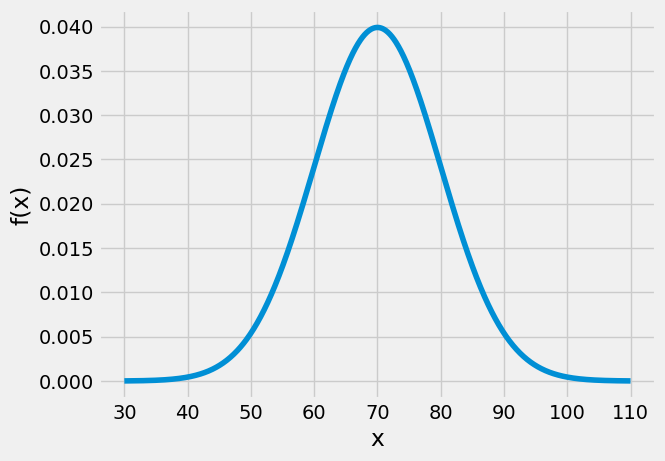

In [540]:
mu=70
sigma=10
x = np.linspace(mu-4*sigma, mu+4*sigma,1000)
pdf = norm.pdf(x, mu, sigma)
plots.plot(x, pdf)
plots.xlabel("x")
plots.ylabel("f(x)")

Text(0, 0.5, 'f(x)')

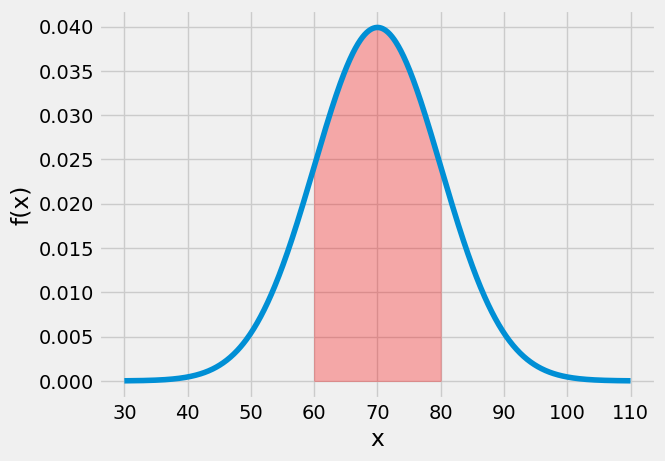

In [574]:
plots.plot(x, pdf)
k = 1
x_fill = np.linspace(mu- k*sigma, mu+ k*sigma, 100)
y_fill = norm.pdf(x_fill, mu, sigma)
plots.fill_between(x_fill, y_fill, color=color, alpha=0.3, label=label)
plots.xlabel("x")
plots.ylabel("f(x)")

In [575]:
stats.norm.cdf(1)

0.84134474606854293

In [576]:
p_izquierda = norm.cdf(mu - 1*sigma, mu, sigma)  
p_derecha = norm.cdf(mu + 1*sigma, mu, sigma)  
Area=p_derecha-p_izquierda

In [577]:
Area*100

68.268949213708581